##                      PROJECT ON HEALTH INSURANCE PURCHASE

In [1]:
## importing the necessary libraries and dataset

import pandas as pd 
import seaborn as sns
import numpy as np
import joblib, os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import pickle  # Make sure to import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


df=pd.read_csv('TRAIN.csv') 
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494240
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [2]:
# checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [3]:
df.info

<bound method DataFrame.info of             age     sex        bmi smoker     region  children       charges
0     21.000000    male  25.745000     no  northeast         2   3279.868550
1     36.976978  female  25.744165    yes  southeast         3  21454.494240
2     18.000000    male  30.030000     no  southeast         1   1720.353700
3     37.000000    male  30.676891     no  northeast         3   6801.437542
4     58.000000    male  32.010000     no  southeast         1  11946.625900
...         ...     ...        ...    ...        ...       ...           ...
3625  48.820767  female  41.426984     no  northwest         4  10987.324960
3626  38.661977  female  26.202557     no  southeast         2  11735.844350
3627  56.000000    male  40.300000     no  southwest         0  10602.385000
3628  48.061207  female  34.930624     no  southeast         1   8976.140452
3629  37.598865  female  25.219233     no  northeast         3   7027.698968

[3630 rows x 7 columns]>

In [4]:
## getting basic information about the dataset
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807221
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

In [6]:
## getting the number of male and female in our dataset
df['sex'].value_counts()

sex
male      2029
female    1601
Name: count, dtype: int64

<Axes: xlabel='smoker'>

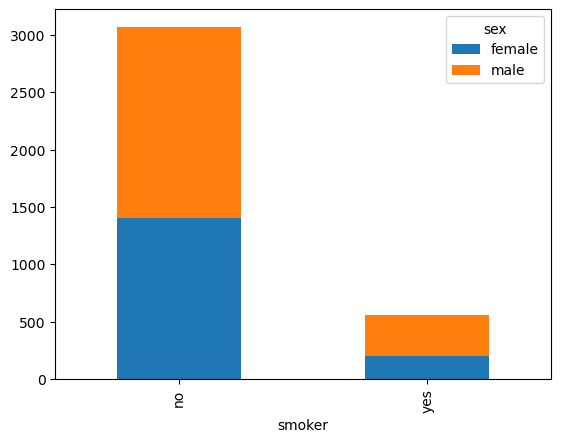

In [7]:
## getting the number of male and female in our dataset

df.groupby(['smoker','sex']).size().unstack().plot(kind='bar',stacked=True)

In [8]:
## getting the number of those coming from the various regions in our dataset
df['region'].value_counts()

region
southeast    1021
northwest     911
southwest     850
northeast     848
Name: count, dtype: int64

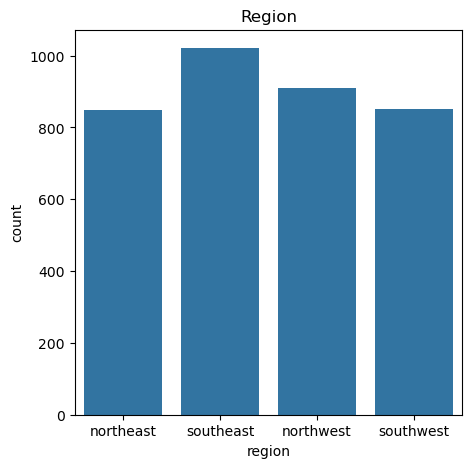

In [9]:
# the effect of charges base on the region

plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [10]:
df.groupby(['smoker','sex']).count()

age   bmi  region  children  charges
smoker sex                                          
no     female  1405  1405    1405      1405     1405
       male    1665  1665    1665      1665     1665
yes    female   196   196     196       196      196
       male     364   364     364       364      364

Text(0.5, 1.0, 'Cost vs Region')

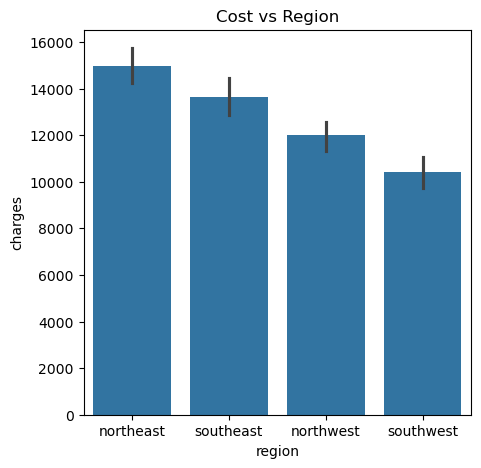

In [11]:

plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

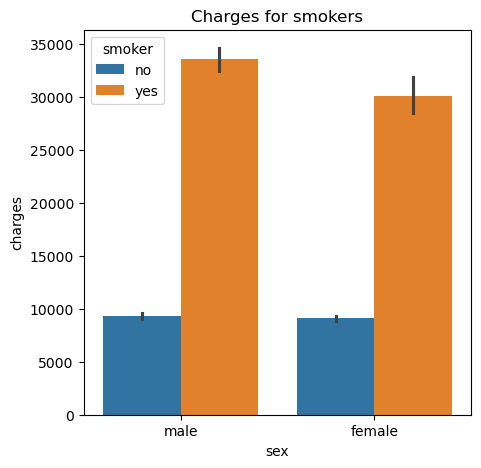

In [12]:
## the effect of charges to smokers
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

In [13]:
import os
import joblib
from sklearn.preprocessing import LabelEncoder

# Define save directory
save_dir = r"C:\Users\Administrator\Downloads\DOCKER AND KUBERNETES"

# Fit encoders on the training data
sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
region_encoder = LabelEncoder()

df['sex'] = sex_encoder.fit_transform(df['sex'])
df['smoker'] = smoker_encoder.fit_transform(df['smoker'])
df['region'] = region_encoder.fit_transform(df['region'])

# Save each encoder to the specified path
joblib.dump(sex_encoder, os.path.join(save_dir, "sex_encoder.joblib"))
joblib.dump(smoker_encoder, os.path.join(save_dir, "smoker_encoder.joblib"))
joblib.dump(region_encoder, os.path.join(save_dir, "region_encoder.joblib"))

print("Encoders saved successfully.")


Encoders saved successfully.


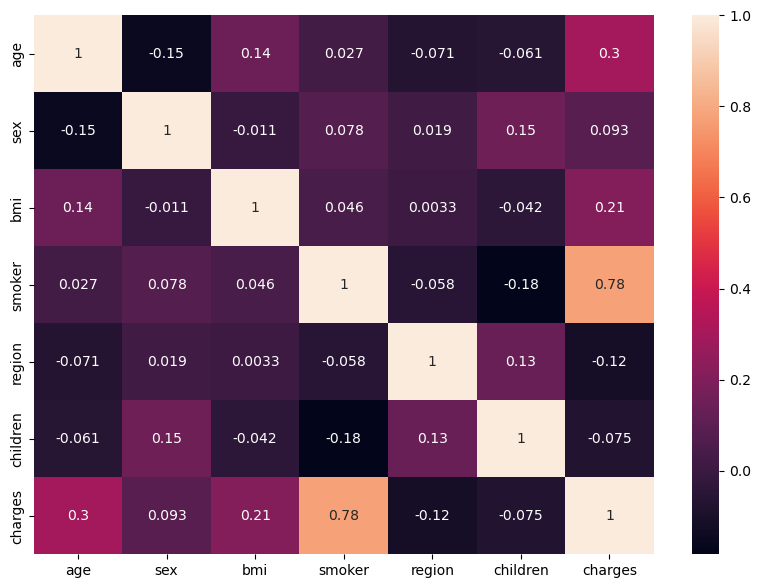

In [14]:
## getting correlated features with target variables
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [15]:
# splitting up our dataset into features x , and target y

x=df.drop(columns=['charges'],axis=1)

In [16]:
x

,age,sex,bmi,smoker,region,children
0,21.000000,1,25.745000,0,0,2
1,36.976978,0,25.744165,1,2,3
2,18.000000,1,30.030000,0,2,1
3,37.000000,1,30.676891,0,0,3
4,58.000000,1,32.010000,0,2,1
...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,1,4
3626,38.661977,0,26.202557,0,2,2
3627,56.000000,1,40.300000,0,3,0
3628,48.061207,0,34.930624,0,2,1


In [17]:
y=df['charges']

In [18]:
y

0        3279.868550
1       21454.494240
2        1720.353700
3        6801.437542
4       11946.625900
            ...     
3625    10987.324960
3626    11735.844350
3627    10602.385000
3628     8976.140452
3629     7027.698968
Name: charges, Length: 3630, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

# Explicitly setting test size (commonly 20-30%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,    # 20% for testing
    random_state=25   # for reproducibility
    
)

In [20]:

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data (to avoid data leakage)
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Show the scaled data
print("Scaled Training Data:\n", x_train_scaled)
print("Scaled Test Data:\n", x_test_scaled)


Scaled Training Data:
 [[ 1.32591623 -1.12638803 -0.15460957 -0.41860805 -1.39007835 -1.46272203]
 [-1.0245505   0.88779352  0.17525765 -0.41860805 -0.47095551 -0.29751979]
 [ 0.39803202 -1.12638803  0.32295295 -0.41860805  1.36729018 -0.88012091]
 ...
 [ 1.23335981  0.88779352  1.44748547 -0.41860805  1.36729018 -0.88012091]
 [ 0.06635953  0.88779352 -2.12996152 -0.41860805  0.44816734  1.45028358]
 [ 1.30717998 -1.12638803  0.75947027 -0.41860805 -0.47095551  0.86768246]]
Scaled Test Data:
 [[-0.35282129  0.88779352 -0.41939855 -0.41860805  0.44816734  0.86768246]
 [-1.59499481  0.88779352 -0.20807672 -0.41860805  1.36729018  1.45028358]
 [-0.65543611 -1.12638803  0.07157517 -0.41860805 -1.39007835 -1.46272203]
 ...
 [-0.9856615  -1.12638803  0.10637283 -0.41860805 -0.47095551 -0.88012091]
 [-1.20731798 -1.12638803 -0.64535426 -0.41860805  0.44816734  0.86768246]
 [ 1.82125431 -1.12638803  1.5431496  -0.41860805  1.36729018 -0.29751979]]


In [21]:
import joblib

# Save the scaler for later use (when predicting on new data)
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [22]:
# inertialising our model
model=LinearRegression()

In [23]:
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.7293


In [24]:
y_pred[:10]

array([ 8739.30857283,  5455.72869758,  6370.33324359,  9454.3851376 ,
        4677.95853535, 36282.68226418,  8877.87949489,  5296.70449466,
        5301.8151617 , 33687.0182811 ])

In [25]:
y_test[:10]

359      6951.199011
1311     4828.514248
1006     4347.023350
354      9634.152291
1557     1826.843000
2030    41920.079430
340     18638.613220
1541     5127.607696
2894     4772.875889
2259    22198.875700
Name: charges, dtype: float64

In [26]:
## getting the featues that influence our model greatly

from sklearn.inspection import permutation_importance
r = permutation_importance(model, x_test, y_test,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

age     1.458 +/- 0.179
smoker  0.343 +/- 0.070
children0.059 +/- 0.029
sex     0.029 +/- 0.005


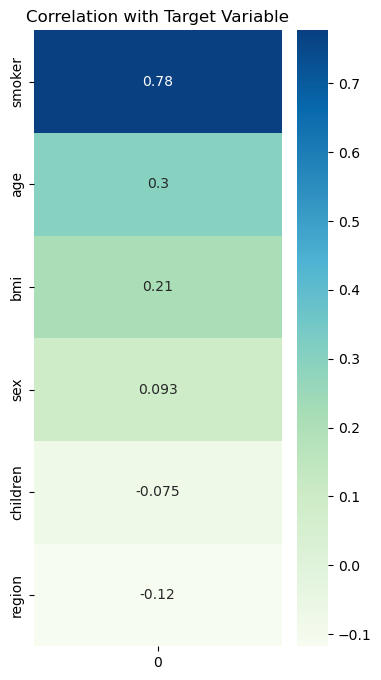

In [27]:
# Create a correlation matrix with target variable
corr_with_target = x.corrwith(y)

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [28]:
data = {'age':50, 'sex':1,'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,1,25,2,1,2


In [29]:
cost_pred = model.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [206792.87083017]


## Pickling The Model file For Deployment

In [30]:

import pickle

In [31]:
import pickle

with open('regmodel.pkl', 'wb') as f:
    pickle.dump(model, f)


In [32]:
import pickle

with open('regmodel.pkl', 'rb') as file:
    pickled_model = pickle.load(file)


In [33]:

save_dir = r"C:\Users\Administrator\Downloads\DOCKER AND KUBERNETES"

# Paths to save files
model_path = os.path.join(save_dir, "model.joblib")
scaler_path = os.path.join(save_dir, "scaler.joblib")

# Save the model and scaler
joblib.dump(model, model_path)
joblib.dump(scaler, scaler_path)

print(f"Model saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

Model saved to: C:\Users\Administrator\Downloads\DOCKER AND KUBERNETES\model.joblib
Scaler saved to: C:\Users\Administrator\Downloads\DOCKER AND KUBERNETES\scaler.joblib


In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

In [35]:
import sklearn, pandas, numpy, joblib

print("scikit-learn:", sklearn.__version__)
print("pandas:", pandas.__version__)
print("numpy:", numpy.__version__)
print("joblib:", joblib.__version__)



scikit-learn: 1.4.2
pandas: 2.2.3
numpy: 1.26.4
joblib: 1.4.2


In [36]:
!pip install flask


In [37]:
import sklearn
import pandas
import numpy
import joblib
import flask
import pytest

print("scikit-learn:", sklearn.__version__)
print("pandas:", pandas.__version__)
print("numpy:", numpy.__version__)
print("joblib:", joblib.__version__)
print("flask:", flask.__version__)
print("pytest:", pytest.__version__)


scikit-learn: 1.4.2
pandas: 2.2.3
numpy: 1.26.4
joblib: 1.4.2
flask: 2.2.5
pytest: 7.4.4
